In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [45]:
# Import DataFrame and create Credit Card dataset
main_df = pd.read_csv('Rates_MO.csv')

main_df.columns 

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [46]:
# Create credit card dataset
ccard_df = main_df[['observation_date', 'CCARD_CO', 'CCARD_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

ccard_df.head()

,observation_date,CCARD_CO,CCARD_DELNQ,GDP,Household_DBT_Inc,Consumer_Confidence,FEDFUNDS,SAVINGS_RATE_MO,UNRATE
0,1991-01-01,4.16,5.26,-1.9,11.578032,66.8,6.91,9.4,6.4
1,1991-02-01,4.16,5.26,-1.9,11.578032,70.4,6.25,9.0,6.6
2,1991-03-01,4.16,5.26,-1.9,11.578032,87.7,6.12,8.1,6.8
3,1991-04-01,4.60,5.48,3.2,11.434237,81.8,5.91,8.7,6.7
4,1991-05-01,4.60,5.48,3.2,11.434237,78.3,5.78,8.5,6.9


# Part One: Raw Data Visualizations

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/3304366779.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d.corr()


<Axes: >

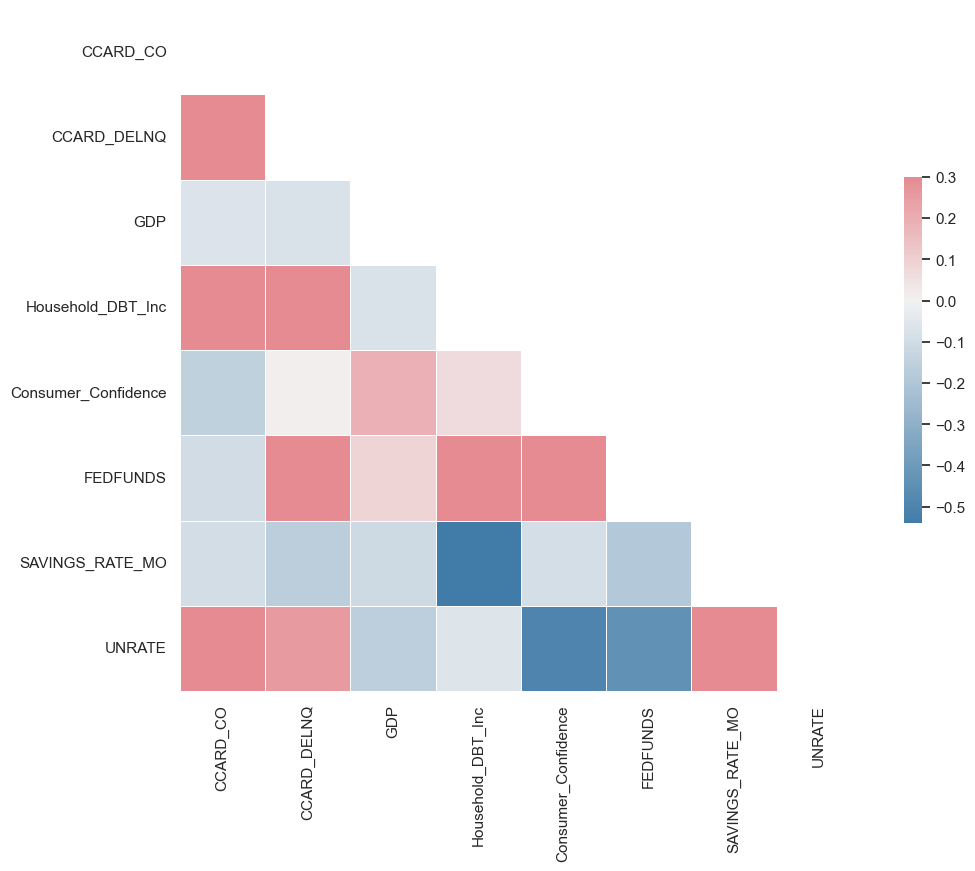

In [47]:
# Compute the Correlation Matrix for Credit Cards

sns.set_theme(style="white")

# Generate random dataset
#from string import ascii_letters
#rs = np.random.RandomState(33)
d = ccard_df

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [48]:
# Binning the data for Box Plots
ccard_df["CO_Groups"] = pd.qcut(ccard_df['CCARD_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])
ccard_df.head()

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/3683617995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccard_df["CO_Groups"] = pd.qcut(ccard_df['CCARD_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])


,observation_date,CCARD_CO,CCARD_DELNQ,GDP,Household_DBT_Inc,Consumer_Confidence,FEDFUNDS,SAVINGS_RATE_MO,UNRATE,CO_Groups
0,1991-01-01,4.16,5.26,-1.9,11.578032,66.8,6.91,9.4,6.4,Medium-High
1,1991-02-01,4.16,5.26,-1.9,11.578032,70.4,6.25,9.0,6.6,Medium-High
2,1991-03-01,4.16,5.26,-1.9,11.578032,87.7,6.12,8.1,6.8,Medium-High
3,1991-04-01,4.60,5.48,3.2,11.434237,81.8,5.91,8.7,6.7,Medium-High
4,1991-05-01,4.60,5.48,3.2,11.434237,78.3,5.78,8.5,6.9,Medium-High


<Axes: xlabel='CCARD_DELNQ', ylabel='CO_Groups'>

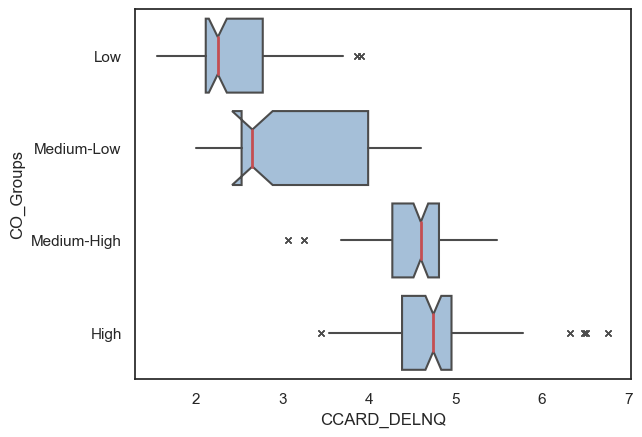

In [49]:
# Create box plot with CCard Charge Offs and Delinquencies

sns.boxplot(
    data=ccard_df, x="CCARD_DELNQ", y="CO_Groups", #data is the ccard_df, X is the table of Xs
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

In [50]:
main_df.columns 

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [51]:
# Create mortgage loan dataset
mort_df = main_df[['observation_date', 'Mortgage_CO', 'Mortgage_DELNQ', 'GDP', 'Household_DBT_Inc', 'Consumer_Confidence', 'FEDFUNDS', 'SAVINGS_RATE_MO', 'UNRATE']]

mort_df.head()

,observation_date,Mortgage_CO,Mortgage_DELNQ,GDP,Household_DBT_Inc,Consumer_Confidence,FEDFUNDS,SAVINGS_RATE_MO,UNRATE
0,1991-01-01,0.20,3.09,-1.9,11.578032,66.8,6.91,9.4,6.4
1,1991-02-01,0.20,3.09,-1.9,11.578032,70.4,6.25,9.0,6.6
2,1991-03-01,0.20,3.09,-1.9,11.578032,87.7,6.12,8.1,6.8
3,1991-04-01,0.18,3.18,3.2,11.434237,81.8,5.91,8.7,6.7
4,1991-05-01,0.18,3.18,3.2,11.434237,78.3,5.78,8.5,6.9


/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/2528712991.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d.corr()


<Axes: >

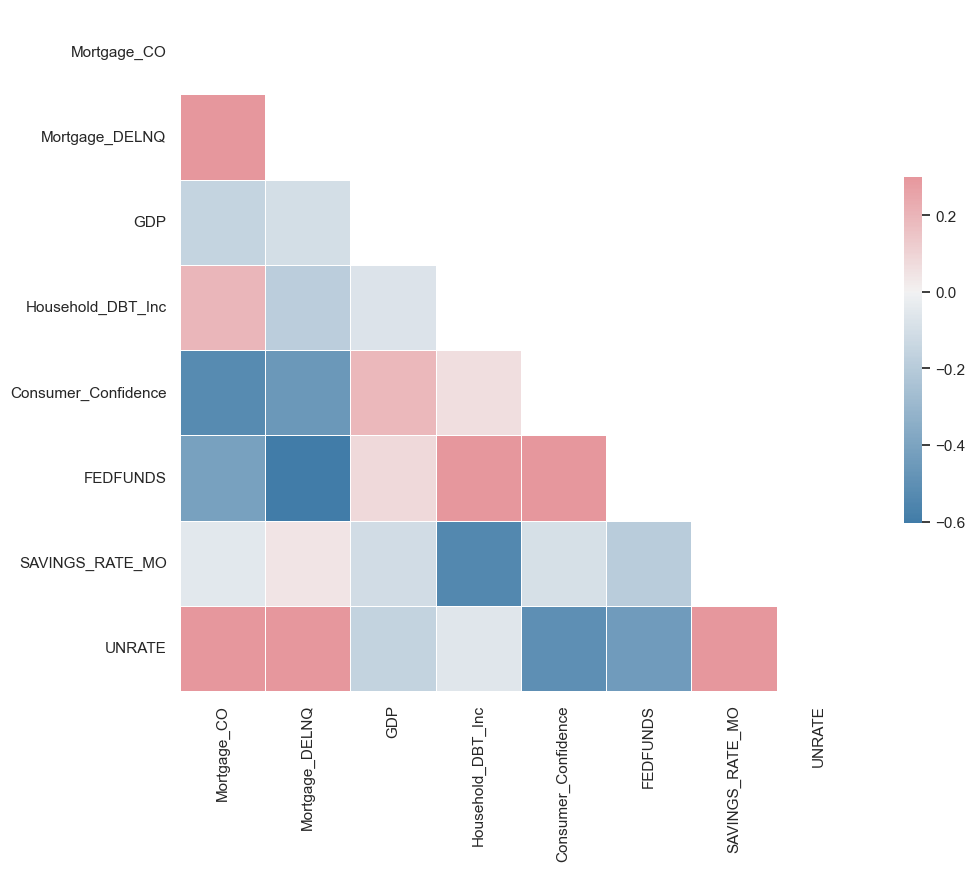

In [52]:
# Compute the Correlation Matrix for Mortgage Loans

sns.set_theme(style="white")

# Generate random dataset
#from string import ascii_letters
#rs = np.random.RandomState(33)
d = mort_df

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
# Binning the data for Box Plots
mort_df["MORT_Groups"] = pd.qcut(mort_df['Mortgage_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/1648356509.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mort_df["MORT_Groups"] = pd.qcut(mort_df['Mortgage_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])


<Axes: xlabel='Mortgage_DELNQ', ylabel='MORT_Groups'>

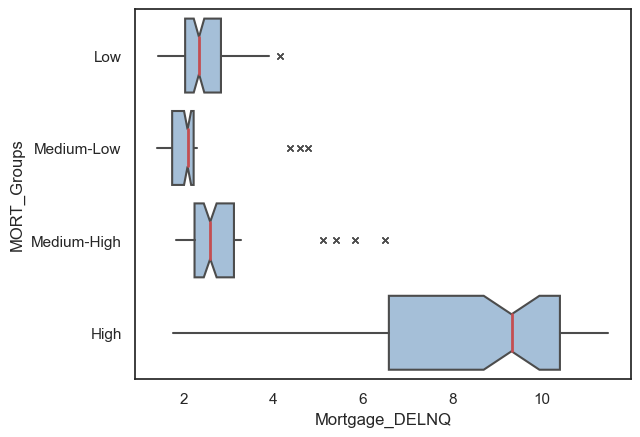

In [54]:
# Create box plot with Mortgage Loan Charge Offs and Delinquencies

sns.boxplot(
    data=mort_df, x="Mortgage_DELNQ", y="MORT_Groups", #data is the ccard_df, X is the table of Xs
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

In [55]:
main_df.columns

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [56]:
# Create C&I loan dataset
CI_df = main_df[['observation_date', 'C&I_CO', 'C&I_DELNQ', 'GDP', 'CORP_DEBT_NET_WORTH', 'Manufacturing_Confidence', 'FEDFUNDS', 'CORP_SAVINGS_LEVEL', 'UNRATE']]

CI_df.head()

,observation_date,C&I_CO,C&I_DELNQ,GDP,CORP_DEBT_NET_WORTH,Manufacturing_Confidence,FEDFUNDS,CORP_SAVINGS_LEVEL,UNRATE
0,1991-01-01,1.48,6.29,-1.9,46.132964,96.951745,6.91,77.964,6.4
1,1991-02-01,1.48,6.29,-1.9,46.132964,96.972896,6.25,77.964,6.6
2,1991-03-01,1.48,6.29,-1.9,46.132964,97.223425,6.12,77.964,6.8
3,1991-04-01,1.87,6.41,3.2,46.289579,97.678049,5.91,81.294,6.7
4,1991-05-01,1.87,6.41,3.2,46.289579,98.292261,5.78,81.294,6.9


/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/3163742927.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d.corr()


<Axes: >

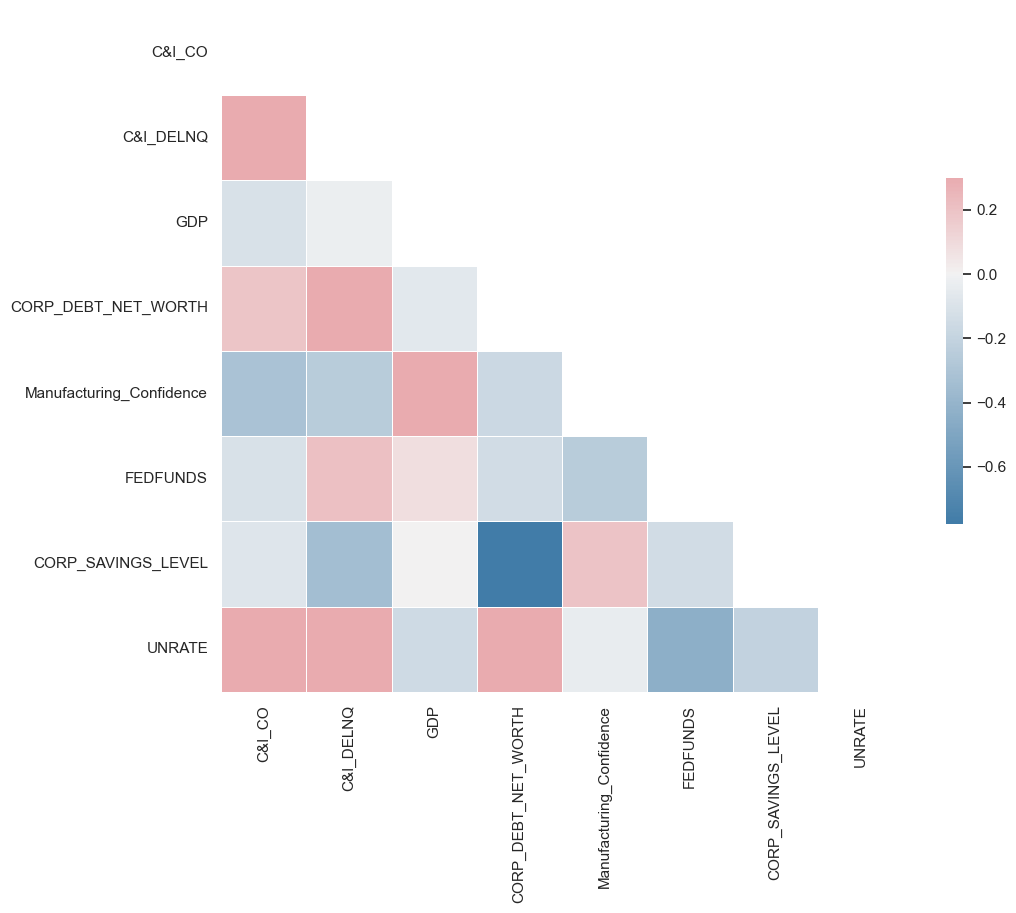

In [57]:
# Compute the Correlation Matrix for C&I Loans

sns.set_theme(style="white")

# Generate random dataset
#from string import ascii_letters
#rs = np.random.RandomState(33)
d = CI_df

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
# Binning the data for Box Plots
CI_df["CI_Groups"] = pd.qcut(CI_df['C&I_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/2846662637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CI_df["CI_Groups"] = pd.qcut(CI_df['C&I_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])


<Axes: xlabel='C&I_DELNQ', ylabel='CI_Groups'>

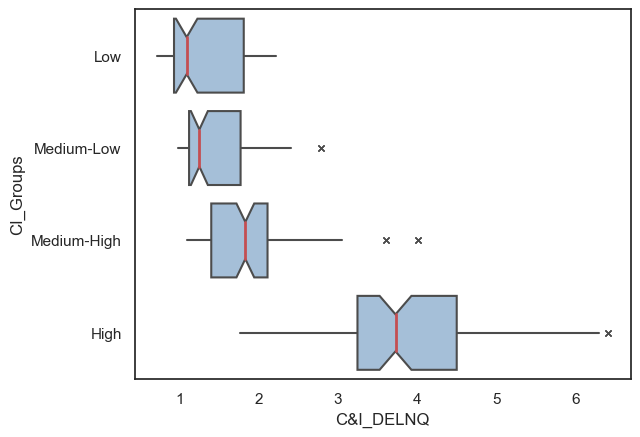

In [59]:
# Create box plot with Mortgage Loan Charge Offs and Delinquencies

sns.boxplot(
    data=CI_df, x="C&I_DELNQ", y="CI_Groups", #data is the ccard_df, X is the table of Xs
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

In [60]:
main_df.columns

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [61]:
# Create CRE loan dataset
CRE_df = main_df[['observation_date', 'CRE_CO', 'CRE_DELNQ', 'Rental_Vacancy_Rate', 'GDP', 'CORP_DEBT_NET_WORTH', 'Manufacturing_Confidence', 'FEDFUNDS', 'CORP_SAVINGS_LEVEL', 'UNRATE']]

CRE_df.head()

,observation_date,CRE_CO,CRE_DELNQ,Rental_Vacancy_Rate,GDP,CORP_DEBT_NET_WORTH,Manufacturing_Confidence,FEDFUNDS,CORP_SAVINGS_LEVEL,UNRATE
0,1991-01-01,1.40,12.08,7.5,-1.9,46.132964,96.951745,6.91,77.964,6.4
1,1991-02-01,1.40,12.08,7.5,-1.9,46.132964,96.972896,6.25,77.964,6.6
2,1991-03-01,1.40,12.08,7.5,-1.9,46.132964,97.223425,6.12,77.964,6.8
3,1991-04-01,1.67,11.82,7.3,3.2,46.289579,97.678049,5.91,81.294,6.7
4,1991-05-01,1.67,11.82,7.3,3.2,46.289579,98.292261,5.78,81.294,6.9


/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/137892011.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = d.corr()


<Axes: >

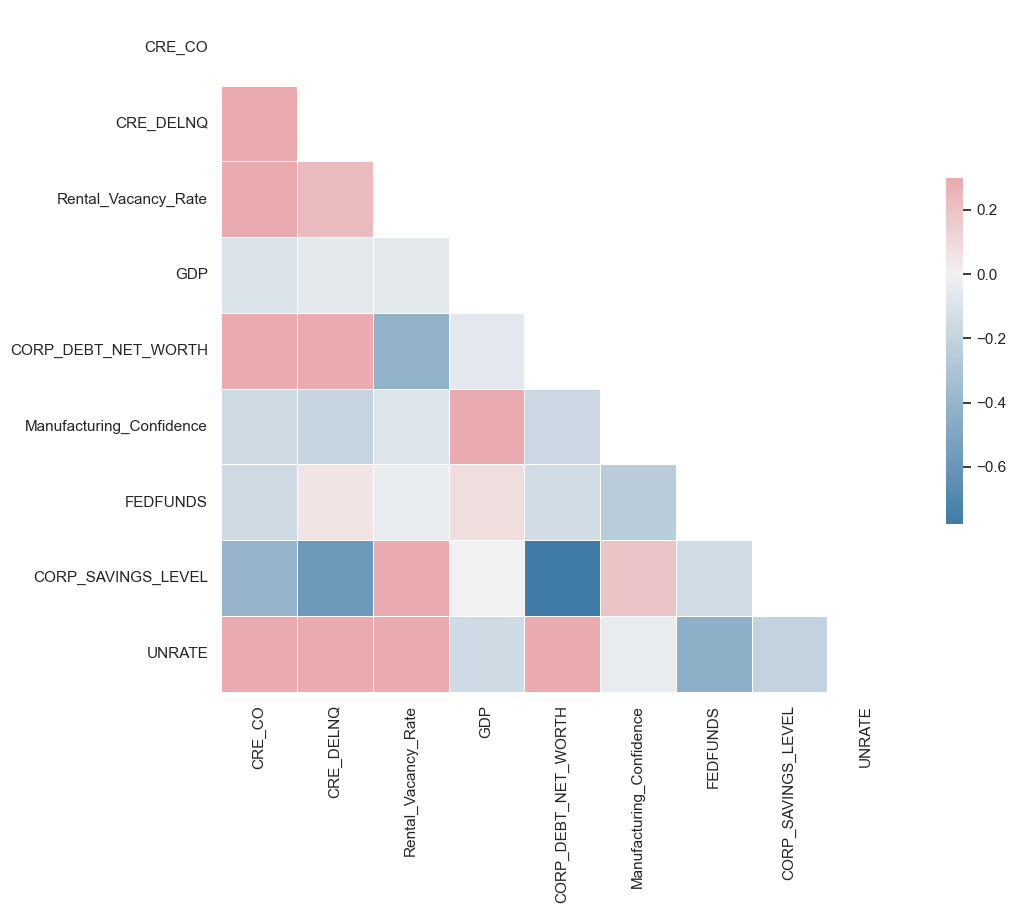

In [62]:
# Compute the Correlation Matrix for CRE Loans

sns.set_theme(style="white")

# Generate random dataset
#from string import ascii_letters
#rs = np.random.RandomState(33)
d = CRE_df

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
# Binning the data for Box Plots
CRE_df["CRE_Groups"] = pd.qcut(CRE_df['CRE_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])

/var/folders/pr/r9s7fv8d3hl7zl078q3rzs_00000gn/T/ipykernel_13462/2820247004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CRE_df["CRE_Groups"] = pd.qcut(CRE_df['CRE_CO'],4, labels= ['Low', 'Medium-Low','Medium-High', 'High'])


<Axes: xlabel='CRE_DELNQ', ylabel='CRE_Groups'>

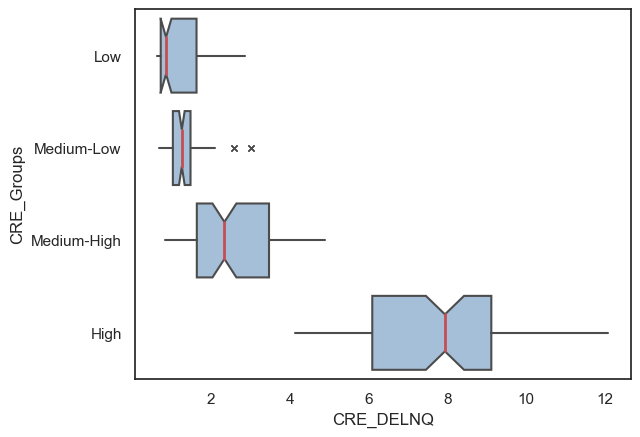

In [64]:
# Create box plot with Mortgage Loan Charge Offs and Delinquencies

sns.boxplot(
    data=CRE_df, x="CRE_DELNQ", y="CRE_Groups", #data is the ccard_df, X is the table of Xs
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.3, .5, .7, .5)},
    medianprops={"color": "r", "linewidth": 2},
)

# Correlation Matrix on all 4 Loan Group COs and Delinquencies

In [79]:
main_df.columns 

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [83]:
all4_df = main_df[['CCARD_CO', 'Mortgage_CO', 'C&I_CO', 'CRE_CO', 'CCARD_DELNQ', 'Mortgage_DELNQ', 'C&I_DELNQ', 'CRE_DELNQ', 'UNRATE']]

all4_df.columns

Index(['CCARD_CO', 'Mortgage_CO', 'C&I_CO', 'CRE_CO', 'CCARD_DELNQ',
       'Mortgage_DELNQ', 'C&I_DELNQ', 'CRE_DELNQ', 'UNRATE'],
      dtype='object')

<Axes: >

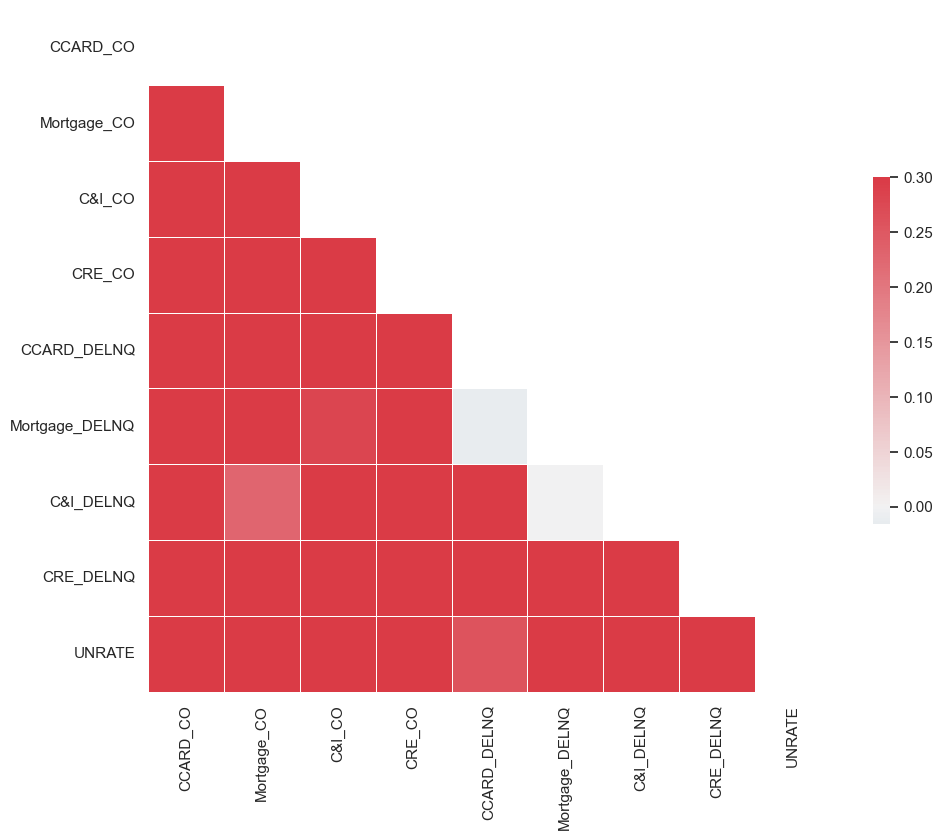

In [84]:
# Compute the Correlation Matrix for all 4 Loan Groups

sns.set_theme(style="white")

# Generate random dataset
#from string import ascii_letters
#rs = np.random.RandomState(33)
d = all4_df

#Compute the correlation matrix
corr = d.corr()

#Generate mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

#Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Part Two: Polynomial Regression on CCard_COs - 1st Attempt

In [7]:
#Import the necessary dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [8]:
# Credit Cards Supervised Machine Learning

#Review the DataFrame:
display(ccard_df.head())

,observation_date,CCARD_CO,CCARD_DELNQ,GDP,Household_DBT_Inc,Consumer_Confidence,FEDFUNDS,SAVINGS_RATE_MO,UNRATE,CO_Groups
0,1991-01-01,4.16,5.26,-1.9,11.578032,66.8,6.91,9.4,6.4,Medium-High
1,1991-02-01,4.16,5.26,-1.9,11.578032,70.4,6.25,9.0,6.6,Medium-High
2,1991-03-01,4.16,5.26,-1.9,11.578032,87.7,6.12,8.1,6.8,Medium-High
3,1991-04-01,4.60,5.48,3.2,11.434237,81.8,5.91,8.7,6.7,Medium-High
4,1991-05-01,4.60,5.48,3.2,11.434237,78.3,5.78,8.5,6.9,Medium-High


In [9]:
# Seperate the y and X variables
y = ccard_df["CCARD_CO"]
X = ccard_df.drop(columns=["CCARD_CO", "observation_date", "CO_Groups"])

In [10]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
# Use the Bayesian Information Criterion (BIC) to model the goodness of fit (degrees)
degrees = range(1, 11) #range of polynomial degrees
bic_values =[]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(X)
    
    #Scale the polynomial features
    scaler = StandardScaler()
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    #Fit a linear regression model using StatsModels
    X_poly_const = sm.add_constant(x_poly)
    model = sm.OLS(y, X_poly_const).fit()
    bic_values.append(model.bic)

In [12]:
# Determine the optimal degree for the Polynomial Regression
optimal_degree = degrees[np.argmin(bic_values)]
print(f"Optimal Degree: {optimal_degree}")

Optimal Degree: 5


In [13]:
# Create a Scikit-learn pipeline to scale the data and apply polynominal regression:

# Instantiate the model with the StandardScaler
model = make_pipeline(StandardScaler(), PolynomialFeatures(optimal_degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [14]:
# Create Predictions
y_pred = model.predict(X_test)

In [15]:
# Evaluate the model's performance
cc_mse = mean_squared_error(y_test, y_pred)
cc_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {cc_mse}')
print(f'R-squared: {cc_r2}')

Mean Squared Error: 467904.66170391045
R-squared: -151720.8456447337


# Plot the Polynomial Regression Results of 1st CCard Attempt

<function matplotlib.pyplot.show(close=None, block=None)>

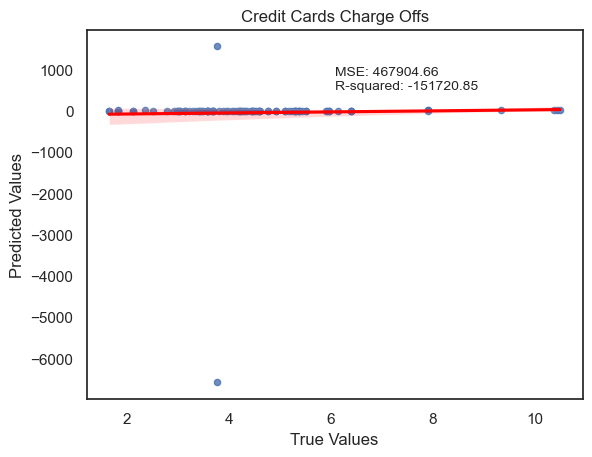

In [18]:
#Create df of the results
results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Scatterplot with regression line
sns.regplot(x='True Values', y='Predicted Values', data=results_df, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Credit Cards Charge Offs')

# Display MSE and R-squared values on the plot
plt.text(0.5, 0.9, f"MSE: {cc_mse:.2f}\nR-squared: {cc_r2:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show

# Part 3: Polynomial Regression on CCard_COs - 2nd Attempt: Limiting Xs

In [65]:
# Credit Cards Supervised Machine Learning - 2nd Attempt
main_df.columns

Index(['Unnamed: 0', 'observation_date', 'C&I_DELNQ', 'CCARD_CO',
       'CCARD_DELNQ', 'CORP_DEBT_NET_WORTH', 'CORP_SAVINGS_LEVEL', 'CRE_CO',
       'CRE_DELNQ', 'GDP', 'Homeowner_Vacancy_rate', 'Household_DBT_Inc',
       'Mortgage_CO', 'Mortgage_DELNQ', 'Rental_Vacancy_Rate',
       'Consumer_Confidence', 'FEDFUNDS', 'Manufacturing_Confidence',
       'SAVINGS_RATE_MO', 'UNRATE', 'C&I_CO'],
      dtype='object')

In [71]:
# Seperate the y and X variables - limit X variables to only positive correlations with COs
y = main_df['CCARD_CO']
X = main_df[['CCARD_DELNQ', 'Household_DBT_Inc', 'UNRATE']]

In [72]:
# train the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [73]:
# Use the Bayesian Information Criterion (BIC) to model the goodness of fit (degrees)
degrees = range(1, 11) #range of polynomial degrees
bic_values =[]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(X)
    
    #Scale the polynomial features
    scaler = StandardScaler()
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    #Fit a linear regression model using StatsModels
    X_poly_const = sm.add_constant(x_poly)
    model = sm.OLS(y, X_poly_const).fit()
    bic_values.append(model.bic)

In [74]:
# Determine the optimal degree for the Polynomial Regression
optimal_degree = degrees[np.argmin(bic_values)]
print(f"Optimal Degree: {optimal_degree}")

Optimal Degree: 10


In [75]:
# Create a Scikit-learn pipeline to scale the data and apply polynominal regression:

# Instantiate the model with the StandardScaler
model = make_pipeline(StandardScaler(), PolynomialFeatures(optimal_degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('linearregression', LinearRegression())])

In [76]:
# Create Predictions
y_pred = model.predict(X_test)

In [77]:
# Evaluate the model's performance
cc2_mse = mean_squared_error(y_test, y_pred)
cc2_r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {cc2_mse}')
print(f'R-squared: {cc2_r2}')

Mean Squared Error: 73030678572835.62
R-squared: -23680784246533.31


<function matplotlib.pyplot.show(close=None, block=None)>

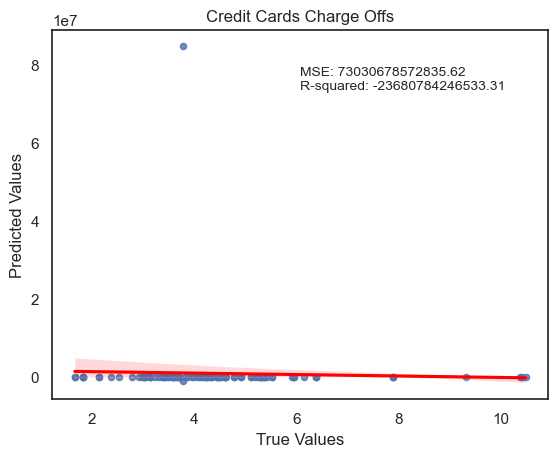

In [78]:
#Create df of the results
results2_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})

# Scatterplot with regression line
sns.regplot(x='True Values', y='Predicted Values', data=results2_df, scatter_kws={'s':20}, line_kws={'color':'red'})

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Credit Cards Charge Offs')

# Display MSE and R-squared values on the plot
plt.text(0.5, 0.9, f"MSE: {cc2_mse:.2f}\nR-squared: {cc2_r2:.2f}", transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.show

# Part Four: Canceled - Moved on to Random Forests Modeling

In [ ]:
# Copy Dataframe
ccard_df_copy = ccard_df.copy()

# Delare X and Y
y = ccard_df_copy["CCARD_CO"]
X_2 = ccard_df_copy.drop(columns=["CCARD_CO","CO_Groups"])

# Shift the X data by 6 months
X_lagged = X_2.copy()
X_lagged.index = pd.to_datetime(X_lagged.index) - pd.DateOffset(months=6)

# Merge the lagged X data with the original X data
#X_with_lag = pd.merge(ccard_df_copy, X_lagged, how="inner", left_index=True, right_index=True, suffixes=('', '_lagged'))
X_with_lag = pd.merge(ccard_df_copy, X_lagged, how="inner", on="observation_date", suffixes=('', '_lagged'))

X_with_lag.drop(columns=["CO_Groups", "CCARD_CO"], inplace=True)

X_with_lag.head()

#Drop rows with NaN values created by the lag
#X_with_lag = X_with_lag.dropna()



In [ ]:
# train the lagged data
X_train, X_test, y_train, y_test = train_test_split(X_with_lag, y, random_state=42)

In [ ]:
# Use the BIC to model the goodness of fit (degrees) with the lagged data
degrees = range(1, 11) #range of polynomial degrees
bic_values =[]

for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    x_poly = poly.fit_transform(X_lagged)
    
    #Scale the polynomial features
    scaler = StandardScaler()
    x_poly_scaled = scaler.fit_transform(x_poly)
    
    #Fit a linear regression model using StatsModels
    X_poly_const = sm.add.constant(X_poly)
    model = sm.OLS(y, X_poly_const).fit()
    bic_values.append(model.bic)

In [ ]:
# Determine the optimal degree for the Polynomial Regression
optimal_degree = degrees[np.argmin(bic_values)]

# Instantiate the model with the StandardScaler
model = make_pipeline(StandardScaler(), PolynomialFeatures(optimal_degree), LinearRegression())

# Train the model
model.fit(X_train, y_train)

# Create Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
cc_lag_mse = mean_squared_error(y_test, y_pred)
cc_lag_r2 = rd_score(y_test, y_pred)

print(f'Mean Squared Error-lagged: {cc_lage_mse}')
print(f'R-squared-lagged: {cc_lag_r2}')